# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [2]:
import pandas as pd

In [3]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198956.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32197.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1660272,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197881,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


In [4]:
#1 Which entities (top 5) had the largest population density in 2020?

In [5]:
facts ["PopDen"]= facts["Pop_2020"]/facts["Area_land"]

In [6]:
facts.sort_values(by="PopDen",ascending=False)[["State","PopDen"]].head(5)

,State,PopDen
9,District of Columbia,4364.208861
32,New Jersey,487.688035
43,Rhode Island,409.775579
42,Puerto Rico,370.531574
23,Massachusetts,347.981239


In [7]:
#2 Which entities have more water area than land area?

In [8]:
facts["MoreWater"]=facts["Area_water"]-facts["Area_land"]

In [9]:
facts[facts["MoreWater"]>0][["State","MoreWater"]]

,State,MoreWater
2,American Samoa,1109
12,Guam,392
37,Northern Mariana Islands,4172
48,United States Virgin Islands,1202


In [10]:
#3 Which entities increased in population the most in the last 10 years?

In [11]:
facts["PopInc"]=facts["Pop_2020"]-facts["Pop_2010"]

In [12]:
facts.sort_values(by="PopInc",ascending=False)[["State","PopInc"]].head(10)

,State,PopInc
47,Texas,3999944.0
10,Florida,2736877.0
5,California,2284267.0
11,Georgia,1024255.0
52,Washington,980741.0
35,North Carolina,903905.0
34,New York,823147.0
3,Arizona,759485.0
6,Colorado,744518.0
51,Virginia,630369.0


In [13]:
#4 What state bird accounts for the largest population as of 2020? Land area?

In [14]:
facts.sort_values(by="Pop_2020", ascending=False).head(1)[["State_bird"]]

,State_bird
5,California quail


In [15]:
facts.sort_values(by="Area_land", ascending=False).head(1)[["State_bird"]]

,State_bird
1,Willow ptarmigan


In [16]:
#5 How many entities' largest city is their capital city?

In [17]:
facts[(facts["Capital_pop"]>facts ["city_1_pop"])&
 (facts["Capital_pop"]>facts ["city_2_pop"])& 
 (facts["Capital_pop"]>facts ["city_3_pop"])&
 (facts["Capital_pop"]>facts ["city_4_pop"])& 
 (facts["Capital_pop"]>facts ["city_5_pop"])]

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,PopDen,MoreWater,PopInc
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0,24.307722,-293181,759485.0
6,Colorado,269601,268431,1170,5773714.0,5029196,8,Lark bunting,Rocky Mountain columbine,Nil sine numine,...,483829.0,Aurora,374114.0,Fort Collins,167830.0,Lakewood,156798.0,21.509118,-267261,744518.0
11,Georgia,153910,148959,4951,10711908.0,9687653,14,Brown thrasher,Cherokee rose,"Wisdom, Justice, Moderation",...,196939.0,Columbus,194160.0,Macon,153095.0,Savannah,147181.0,71.911788,-144008,1024255.0
14,Idaho,216443,214045,2398,1839106.0,1567582,2,Mountain bluebird,"Syringa, mock orange",Esto perpetua,...,106894.0,Nampa,96252.0,Idaho Falls,63398.0,Caldwell,56541.0,8.592147,-211647,271524.0
16,Indiana,94326,92789,1537,6785528.0,6483802,9,Northern cardinal,Peony,The crossroads of America,...,267633.0,Evansville,117963.0,South Bend,103290.0,Carmel,99329.0,73.128582,-91252,301726.0
38,Ohio,116098,105829,10269,11799448.0,11536504,15,Northern cardinal,Scarlet carnation,"With God, all things are possible / Imperium i...",...,382817.0,Cincinnati,302605.0,Toledo,273782.0,Akron,198006.0,111.495412,-95560,262944.0
39,Oklahoma,181037,177660,3377,3959353.0,3751351,5,Scissor-tailed flycatcher,Oklahoma rose,Labor omnia vincit,...,400669.0,Norman,123471.0,Broken Arrow,109471.0,Edmond,93127.0,22.286125,-174283,208002.0
42,Puerto Rico,13791,8868,4924,3285874.0,3725789,1*,None,Flor de Maga,Joannes Est Nomen Eius,...,170480.0,Carolina,147661.0,Ponce,133191.0,Caguas,124434.0,370.531574,-3944,-439915.0
43,Rhode Island,4001,2678,1324,1097379.0,1052567,2,Rhode Island Red,Violet,Hope,...,81274.0,Warwick,80847.0,Pawtucket,71847.0,East Providence,47476.0,409.775579,-1354,44812.0
55,Wyoming,253335,251470,1864,576851.0,563626,1,Western meadowlark,Indian paintbrush,Equal Rights and Cedant arma togae.,...,57461.0,Laramie,32473.0,Gillette,31903.0,Rock Springs,23082.0,2.293916,-249606,13225.0


In [ ]:
#6 Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [21]:
facts["PDrop"]=100*(facts["city_1_pop"]-facts["city_5_pop"])/(facts["city_1_pop"])

In [23]:
facts.sort_values(by="PDrop",ascending=False).head(1)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,PopDen,MoreWater,PopInc,PDrop
34,New York,141297,122057,19240,20201249.0,19378102,26,Eastern bluebird,Rose,Excelsior!,...,Rochester,206284.0,Yonkers,199663.0,Syracuse,142749.0,165.506681,-102817,823147.0,98.392453


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

In [22]:
import pandas as pd
states=pd.read_csv('../data/state_dates.tsv',delimiter="\t")
facts=pd.read_csv('../data/state_facts.tsv',delimiter="\t")
merged=pd.merge(facts,states,left_on='USPS_code',right_on='Abbreviation',how='outer')
merged.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Name,Date,Status,Abbreviation
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Montgomery,198956.0,Mobile,189572.0,Tuscaloosa,101113.0,Alabama,"December 14, 1819",State,AL
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0,Alaska,"January 3, 1959",State,AK
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,American Samoa,"April 17, 1900",Territory,AS
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0,Arizona,"February 14, 1912",State,AZ
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0,Arkansas,"June 15, 1836",State,AR


In [28]:
#7 Of the states that joined the United States before 1790, what is the most common state flower?

In [23]:
merged["FixedDates"] = pd.to_datetime(states["Date"], errors="raise")

In [24]:
df=merged[merged["FixedDates"]<pd.datetime(1790,1,1)]

In [25]:
df["State_flower"].value_counts().idxmax()

'Mountain laurel'

In [ ]:
#8 Which has the larger population density, the most dense US Territory or the least dense state?

In [26]:
merged["PopDen"]=facts["Pop_2020"]/facts["Area_land"]

In [27]:
merged = merged.sort_values(by="PopDen",ascending=False)

In [28]:
merged[merged["Status"].str.contains("Territory")]["PopDen"].max()

370.5315741993685

In [29]:
#10 Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)#1

In [30]:
mergedByDate= merged.sort_values(by="FixedDates",ascending=True)

In [34]:
import matplotlib as plt 
%config InlineBackend.figure_format="retina"

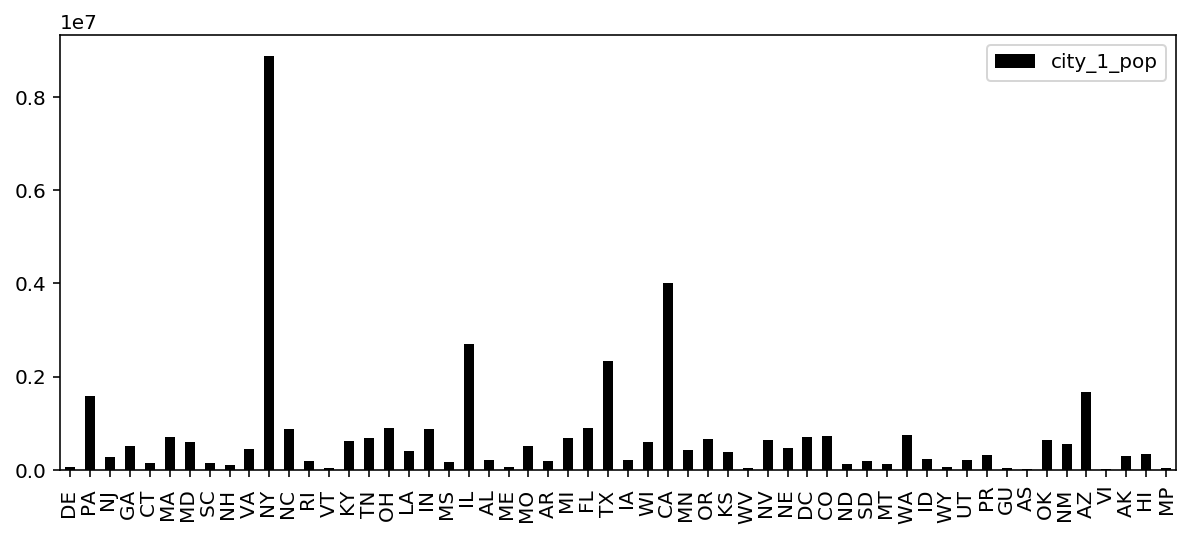

In [39]:
mergedbyDate=merged.sort_values(by='FixedDates',ascending=True)
plot=mergedByDate[['city_1_pop','Abbreviation']].plot(kind='bar',figsize=(10,4), color=['black'])
plot.set_xticklabels(mergedByDate['Abbreviation']);

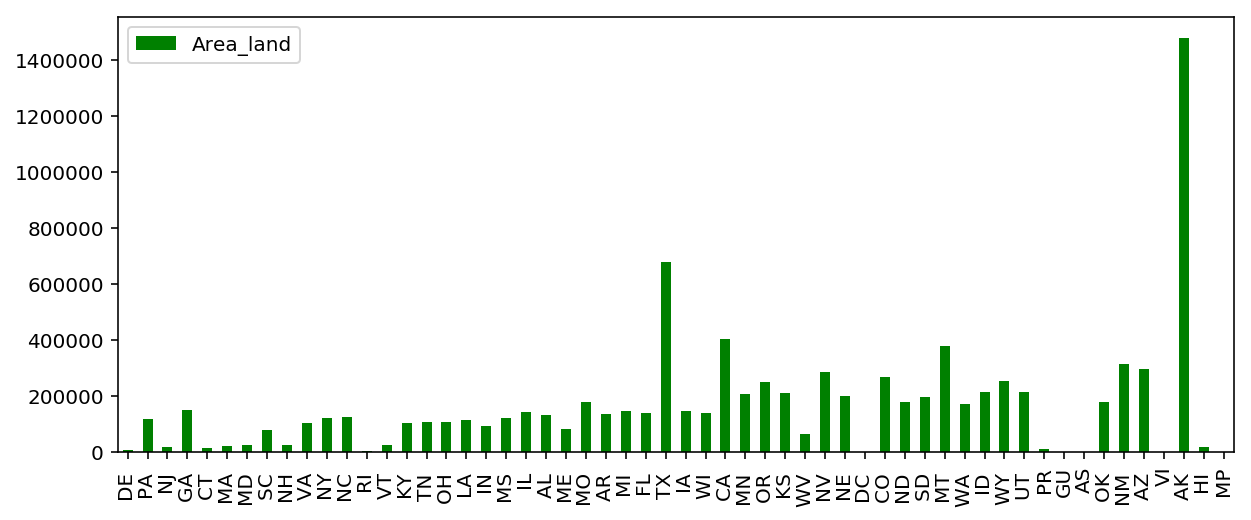

In [40]:
mergedbyDate=merged.sort_values(by='FixedDates',ascending=True)
plot=mergedByDate[['Area_land','Abbreviation']].plot(kind='bar',figsize=(10,4), color=['green'])
plot.set_xticklabels(mergedByDate['Abbreviation']);

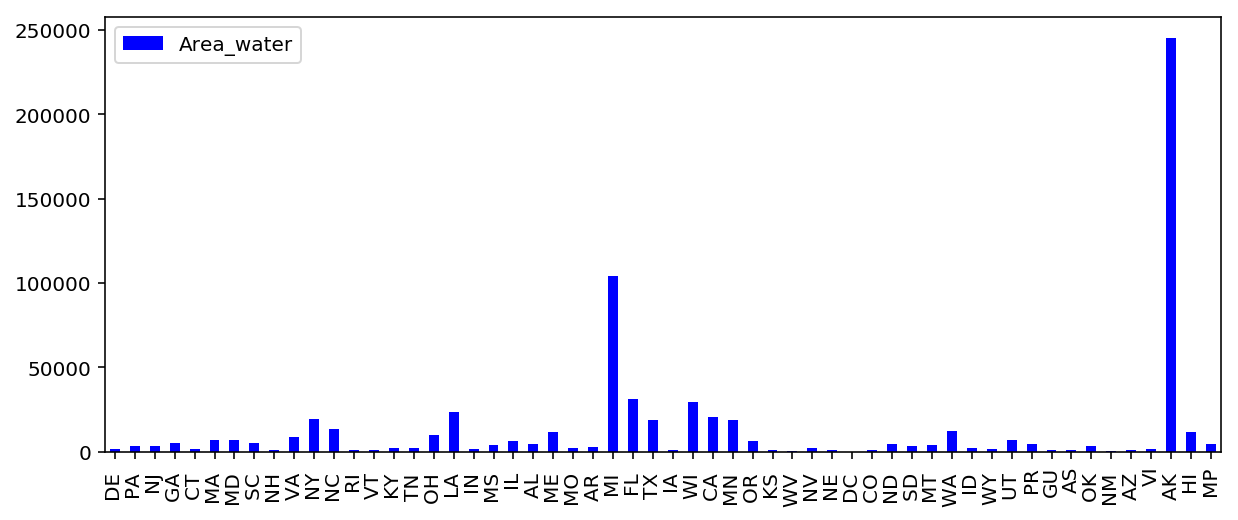

In [42]:
mergedbyDate=merged.sort_values(by='FixedDates',ascending=True)
plot=mergedByDate[['Area_water','Abbreviation']].plot(kind='bar',figsize=(10,4), color=['blue'])
plot.set_xticklabels(mergedByDate['Abbreviation']);

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [ ]:
# Sample code to help with the plots

#import matplotlib as plt
#%config InlineBackend.figure_format ='retina' #This makes your plot clearer


#plot = *your df by date*[[*column*,'Abbreviation']].plot(kind='bar',figsize=(10,4))
#plot.set_xticklabels(*your df by date*['Abbreviation']);